In [ ]:
print("Hello World")
import pandas as pd
import numpy as np
file_path = '/Users/leeanhae/Desktop/Coding Test/project0517.csv'




In [ ]:
pip install --upgrade pip

In [ ]:
pip install pandas

In [ ]:
df = pd.read_csv(file_path)

In [79]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age_Group,R_score,Frequency,F_score,Monetary,M_score,FM_Avg,Customer_Category,Join_Group,Join_Group_Alias
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,50s,5,15,3,1190,5,4,Champions,2014-06,NaN
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,60s,5,18,4,577,3,4,Champions,2014-06,NaN
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,60s,5,11,2,251,3,2,Potential Loyalist,2014-05,NaN
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,50s,5,4,1,11,1,1,New Customers,2014-11,NaN
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,30s,5,8,2,91,2,2,Potential Loyalist,2014-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,40s,1,20,4,689,4,4,At Risk,2013-07,2013년 7월부터 12월
2233,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,40s,1,5,1,55,1,1,Hibernating,2013-01,2013년 1월부터 6월
2234,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,40s,1,14,3,309,3,3,At Risk,2012-03,NaN
2235,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,40s,1,20,4,1383,5,4,At Risk,2012-11,NaN


In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     2237 non-null   int64   
 1   Year_Birth             2237 non-null   int64   
 2   Education              2237 non-null   object  
 3   Marital_Status         2237 non-null   object  
 4   Income                 2237 non-null   float64 
 5   Kidhome                2237 non-null   int64   
 6   Teenhome               2237 non-null   int64   
 7   Dt_Customer            2237 non-null   object  
 8   Recency                2237 non-null   int64   
 9   MntWines               2237 non-null   int64   
 10  MntFruits              2237 non-null   int64   
 11  MntMeatProducts        2237 non-null   int64   
 12  MntFishProducts        2237 non-null   int64   
 13  MntSweetProducts       2237 non-null   int64   
 14  MntGoldProds           2237 non-null   i

In [ ]:
# Recency 점수 부여 (최근 5, 예전 1)
# 적을 수록 최근에 방문, 내림차순 라벨
R_labels = [5,4,3,2,1]
df['R_score'] = pd.qcut(df['Recency'], 5, labels=R_labels)
#Frequency 점수 부여 (자주 5, 덜자주 1)
df['Frequency'] = df['Total_pc']
F_labels = [1,2,3,4,5]
df['F_score'] = pd.qcut(df['Frequency'], 5, labels=F_labels)
#Monetary 점수 부여 (많은 구매금액 5, 적은 구매금액 1)
df['Monetary'] = df['Total_mnt']
M_labels = [1,2,3,4,5]
df['M_score'] = pd.qcut(df['Monetary'], 5, labels=M_labels)

In [ ]:
# RFM(frequency# montary #Recency) 결과 지정
RFM = df[['Id', 'Recency', 'R_score','Frequency', 'F_score','Monetary', 'M_score']]
# RFM 결과 도출
RFM

In [ ]:
# R, F, M 점수 확인
print(df[['R_score', 'F_score', 'M_score']])
df['FM_Avg'] = ((df['F_score'].astype(int)+df['M_score'].astype(int))/2).round().astype(int)
print(df['FM_Avg'])

In [ ]:
# 고객 조건 및 값 정의
conditions = [
    (df['R_score'] == 5) & (df['FM_Avg'].isin([4,5])),
    (df['R_score'].isin([3, 4])) & (df['FM_Avg'].isin([4,5])),
    (df['R_score'].isin([4,5]) & (df['FM_Avg'].isin([2, 3]))),
    (df['R_score'] == 5) & (df['FM_Avg'] == 1),
    (df['R_score'] == 4) & (df['FM_Avg'] == 1),
    (df['R_score'] == 3) & (df['FM_Avg'].isin([1, 2])),
    (df['R_score'] == 3) & (df['FM_Avg'] == 3),
    (df['R_score'].isin([1, 2])) & (df['FM_Avg'] == 5),
    (df['R_score'].isin([1, 2])) & (df['FM_Avg'].isin([3, 4])),
    (df['R_score'].isin([1, 2])) & (df['FM_Avg'].isin([1, 2]))
]
values = [
    'Champions',
    'Loyal Customer',
    'Potential Loyalist',
    'New Customers',
    'Promising',
    'Needs Attention',
    'About to Sleep',
    'Can\'t Lose Them',
    'At Risk',
    'Hibernating'
]

In [ ]:
import matplotlib.pyplot as plt
# numpy.select를 사용하여 조건에 따라 값을 할당
df['Customer_Category'] = np.select(conditions, values, default='Undefined')
# Customer_Category의 비중 계산
category_counts = df['Customer_Category'].value_counts()
category_percentages = category_counts / len(df) * 100
# 시각화
plt.figure(figsize=(8, 8))
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Category Distribution')
plt.axis('equal')
plt.show()

In [ ]:
#RFM 그룹 별 특성 파악
df.groupby(df['Customer_Category']).agg({
    "Id" : "count",
    "Age" : "mean",
    "Income" : "mean",
    "Num_Household_Members" : "mean"
}).reset_index().rename(columns={'Id': 'CustomerCount'})

In [ ]:
#Customer_Category의 수, 나이평균, 임금평균, 가족수 평균 df
customer_category_analysis = df.groupby(df['Customer_Category']).agg({
    "Id" : "count",
    "Age" : "mean",
    "Income" : "mean",
    "Num_Household_Members" : "mean",
    "Education_by_num" : "count"
})
customer_category_analysis

In [ ]:
# 그룹화하여 데이터 요약
grouped_edu = df.groupby(['Customer_Category', 'Education_by_num']).size().unstack(fill_value=0)
# 결과 출력
print(grouped_edu)

In [65]:
# 비율 계산을 위해 각 행의 합 산출.
grouped_edu['Total'] = grouped.sum(axis=1)

# 각 열의 값을 해당 행의 총합으로 나누어 비율을 계산합니다.
ratio_grouped_edu = grouped.drop(columns=['Total']).div(grouped['Total'], axis=0)

# 비율 값을 퍼센트로 변환합니다.
ratio_grouped_edu *= 100

# 소수점을 제거하고 정수로 변환합니다.
ratio_grouped_edu = ratio_grouped_edu.round(0)

# 결과 출력
ratio_grouped_edu



Education_by_num,1,2,3,4
Customer_Category,,,,
About to Sleep,0.0,5.0,2.0,3.0
At Risk,0.0,5.0,2.0,2.0
Can't Lose Them,0.0,5.0,3.0,2.0
Champions,0.0,5.0,2.0,3.0
Hibernating,0.0,5.0,3.0,2.0
Loyal Customer,0.0,5.0,2.0,2.0
Needs Attention,1.0,5.0,3.0,2.0
New Customers,0.0,4.0,3.0,2.0
Potential Loyalist,0.0,5.0,3.0,2.0


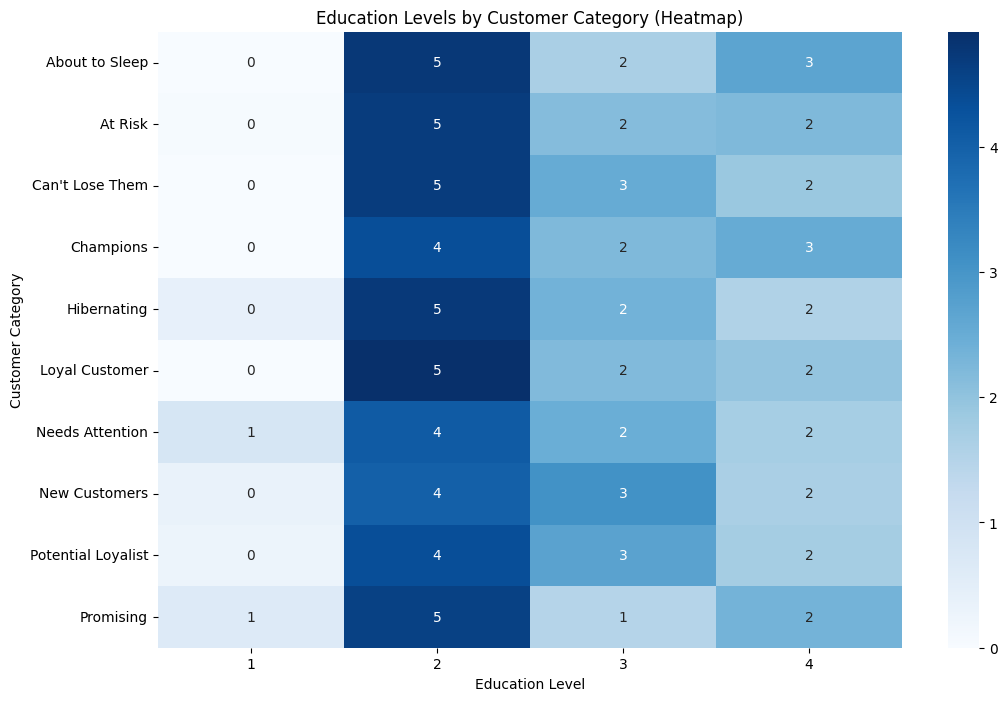

In [66]:

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(ratio_grouped, annot=True, fmt='.0f', cmap='Blues')

# 제목 추가
plt.title('Education Levels by Customer Category (Heatmap)')
plt.xlabel('Education Level')
plt.ylabel('Customer Category')

# 그래프 표시
plt.show()


In [70]:
#칼럼 별 가입날짜 확인 법 
# pandas의 to_datetime 함수를 사용하여 문자열을 datetime으로 변환
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

oldest_date = df['Dt_Customer'].min()
print("가장 오래된 가입 날짜:", oldest_date)

latest_date = df['Dt_Customer'].max()
print("가장 최근의 가입 날짜:", latest_date)

가장 오래된 가입 날짜: 2012-01-08 00:00:00
가장 최근의 가입 날짜: 2014-12-06 00:00:00


In [71]:
# 가입 날짜를 6개월 단위로 변환하여 새로운 열 생성
df['Join_Group'] = pd.to_datetime(df['Dt_Customer']).dt.to_period('6M')

# 그룹화하여 데이터 요약
grouped = df.groupby('Join_Group').size()

# 결과 출력
print(grouped)

Join_Group
2012-01     16
2012-02      9
2012-03     21
2012-04     17
2012-05     17
2012-06     14
2012-07     23
2012-08     91
2012-09     67
2012-10     81
2012-11     62
2012-12     76
2013-01     96
2013-02    113
2013-03    103
2013-04     96
2013-05     93
2013-06     95
2013-07     94
2013-08    104
2013-09     85
2013-10    106
2013-11    100
2013-12    102
2014-01     79
2014-02     65
2014-03     78
2014-04     71
2014-05     81
2014-06     61
2014-07     24
2014-08     16
2014-09     12
2014-10     22
2014-11     23
2014-12     24
Freq: 6M, dtype: int64


In [72]:
# 그룹 별칭 생성
group_aliases = {
    '2012-01': '2012년 1월부터 6월',
    '2012-07': '2012년 7월부터 12월',
    '2013-01': '2013년 1월부터 6월',
    '2013-07': '2013년 7월부터 12월',
    '2014-01': '2014년 1월부터 6월',
    '2014-07': '2014년 7월부터 12월'
}

# 그룹 별칭 적용
df['Join_Group_Alias'] = df['Join_Group'].astype(str).map(group_aliases)

# 그룹화하여 데이터 요약
grouped = df.groupby('Join_Group_Alias').size()

# 결과 출력
print(grouped)

Join_Group_Alias
2012년 1월부터 6월     16
2012년 7월부터 12월    23
2013년 1월부터 6월     96
2013년 7월부터 12월    94
2014년 1월부터 6월     79
2014년 7월부터 12월    24
dtype: int64


In [74]:
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'


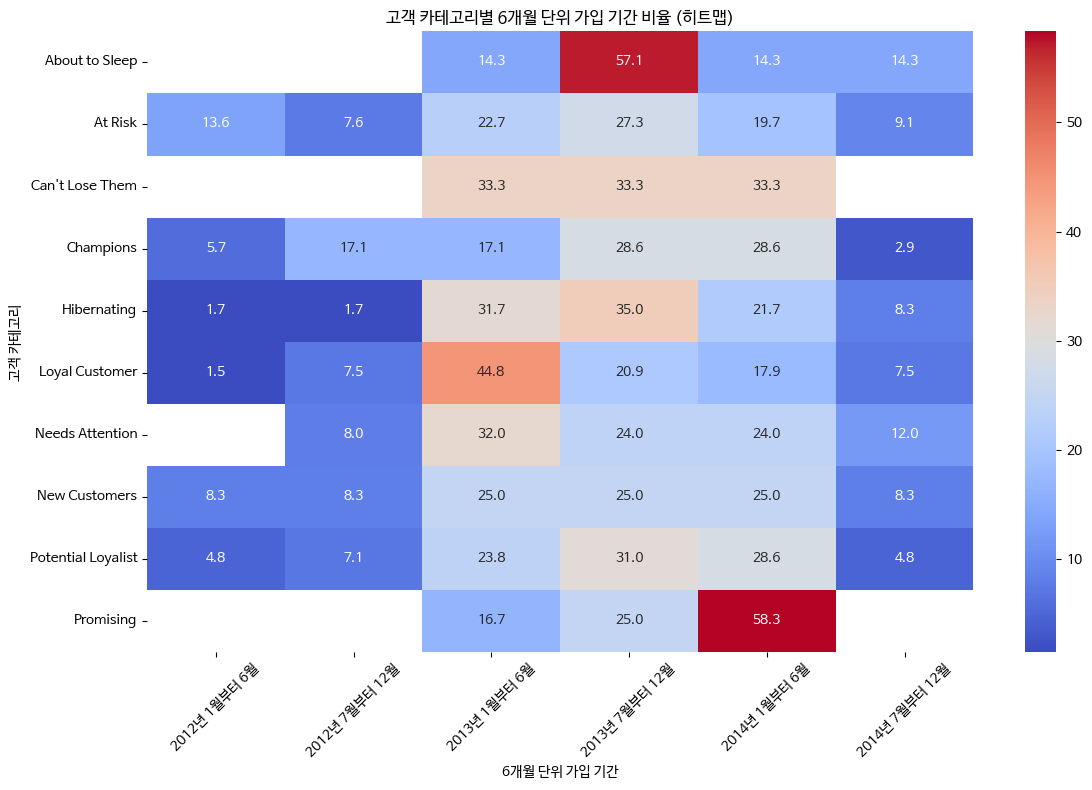

In [77]:
# 가입 연도별 고객 카테고리 비율 데이터 생성
grouped = df.groupby(['Customer_Category', 'Join_Group_Alias'])['Id'].count().unstack()
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_percentage, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('고객 카테고리별 6개월 단위 가입 기간 비율 (히트맵)')
plt.xlabel('6개월 단위 가입 기간')
plt.ylabel('고객 카테고리')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

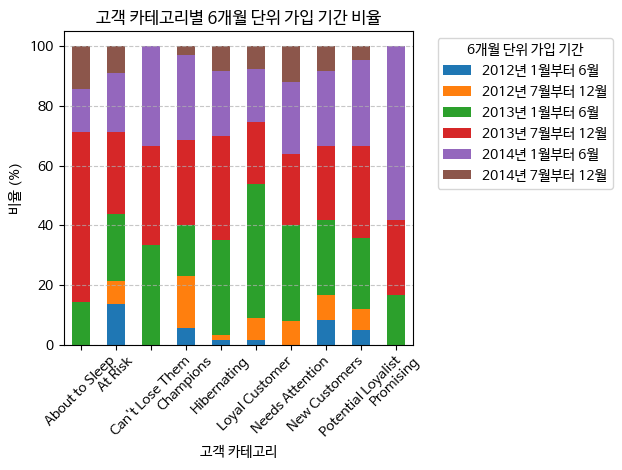

In [78]:
# 막대 그래프 생성
plt.figure(figsize=(12, 8))
grouped_percentage.plot(kind='bar', stacked=True)
plt.title('고객 카테고리별 6개월 단위 가입 기간 비율')
plt.xlabel('고객 카테고리')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend(title='6개월 단위 가입 기간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [80]:
loyal_customer = df['Customer_Category'] == 'Loyal Customer'
loyal_customer_df = df[(df['Customer_Category'] == 'Loyal Customer') & (df['Marital_Status']) & (df['Teenhome']) & (df['Kidhome'])]

In [85]:
lc_df = loyal_customer_df[['Marital_Status', 'Teenhome', 'Kidhome']]
at_risk_customer_df = df[(df['Customer_Category'] == 'At Risk') & (df['Marital_Status']) & (df['Teenhome']) & (df['Kidhome'])]
ar_df =at_risk_customer_df[['Marital_Status', 'Teenhome', 'Kidhome']]

In [88]:
ar_df

,Marital_Status,Teenhome,Kidhome
1375,Together,1,1
1377,Married,1,1
1389,Together,1,1
1405,Single,1,1
1446,Divorced,1,1
1455,Single,1,1
1458,Married,1,1
1459,Married,1,1
1478,Together,1,1
1481,Married,1,1


In [87]:
lc_df

,Marital_Status,Teenhome,Kidhome
471,Married,1,1
493,Together,1,1
505,Divorced,1,1
584,Married,1,1
678,Married,1,1
707,Divorced,1,1
712,Single,1,1
713,Single,1,1
763,Single,1,1
764,Single,1,1


In [82]:
# 'Kidhome'이 1인 고객 비율
lc_kidhome_ratio = (lc_df['Kidhome'] == 1).mean()
ar_kidhome_ratio = (ar_df['Kidhome'] == 1).mean()

In [83]:
# 'Teenhome'이 1인 고객 비율
lc_teenhome_ratio = (lc_df['Teenhome'] == 1).mean()
ar_teenhome_ratio = (ar_df['Teenhome'] == 1).mean()

In [84]:
# 결과 출력
print("Loyal Customer - Kidhome이 1인 비율:", lc_kidhome_ratio)
print("At Risk - Kidhome이 1인 비율:", ar_kidhome_ratio)
print("Loyal Customer - Teenhome이 1인 비율:", lc_teenhome_ratio)
print("At Risk - Teenhome이 1인 비율:", ar_teenhome_ratio)

Loyal Customer - Kidhome이 1인 비율: 1.0
At Risk - Kidhome이 1인 비율: 1.0
Loyal Customer - Teenhome이 1인 비율: 1.0
At Risk - Teenhome이 1인 비율: 1.0


In [110]:
# Marital_Status를 'couple'과 'single'로 분류하는 명시적인 함수
def classify_marital_status(status):
    if status in ['Married', 'Together']:
        return 'couple'
    else:
        return 'single'

# 함수를 적용하여 새로운 열 생성
df['Marital_Status_Group'] = df['Marital_Status'].apply(classify_marital_status)

# 자녀 수 그룹 생성
df['Children_Group'] = df['Kidhome'] + df['Teenhome']

# 그룹화하여 데이터 요약
grouped_df = df.groupby([ 'Customer_Category', 'Marital_Status_Group', 'Children_Group']).size().reset_index(name='Count')

# 출력되는 최대 열 수 설정
pd.set_option('display.max_columns', None)

# 출력되는 최대 행 수 설정
pd.set_option('display.max_rows', None)

# DataFrame 출력
grouped_df


,Customer_Category,Marital_Status_Group,Children_Group,Count
0,About to Sleep,couple,0,6
1,About to Sleep,couple,1,17
2,About to Sleep,couple,2,10
3,About to Sleep,single,0,1
4,About to Sleep,single,1,7
5,About to Sleep,single,2,3
6,At Risk,couple,0,85
7,At Risk,couple,1,150
8,At Risk,couple,2,44
9,At Risk,couple,3,7


In [112]:
# 원하는 카테고리들
desired_categories = ['At Risk', 'Champions', 'Hibernating', 'Loyal Customer', 'Potential Loyalist']

# 원하는 카테고리들만 필터링하여 새로운 DataFrame 생성
filtered_df = grouped_df[grouped_df['Customer_Category'].isin(desired_categories)]

# 출력
filtered_df

,Customer_Category,Marital_Status_Group,Children_Group,Count
6,At Risk,couple,0,85
7,At Risk,couple,1,150
8,At Risk,couple,2,44
9,At Risk,couple,3,7
10,At Risk,single,0,89
11,At Risk,single,1,68
12,At Risk,single,2,11
13,At Risk,single,3,4
22,Champions,couple,0,65
23,Champions,couple,1,58


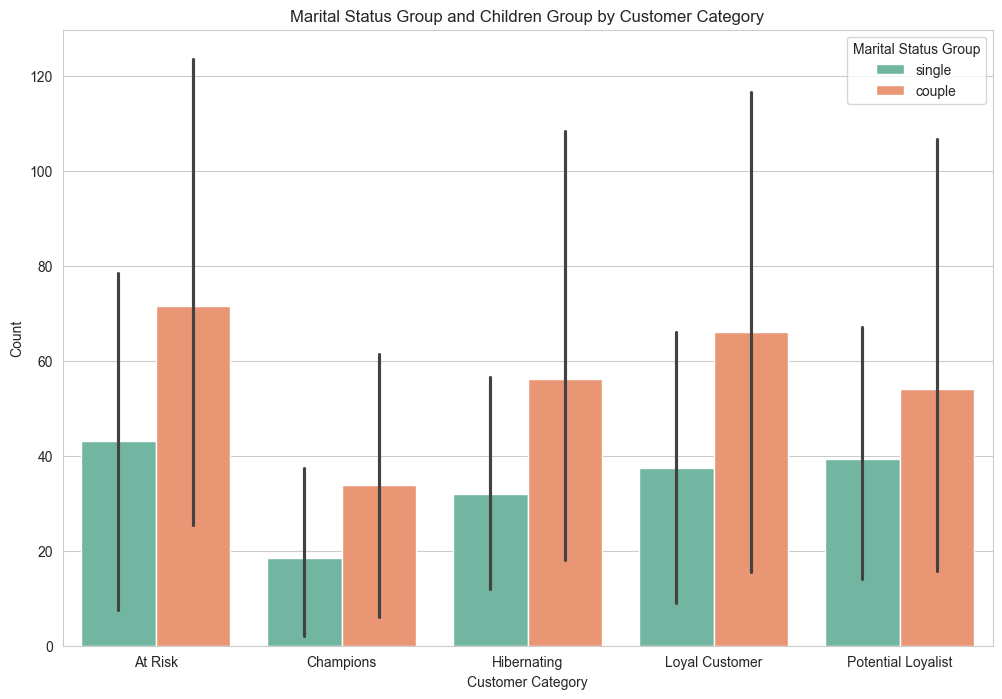

In [114]:
# 시각화 설정
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# 시각화
sns.barplot(data=filtered_df, x='Customer_Category', y='Count', hue='Marital_Status_Group', 
            hue_order=['single', 'couple'], palette='Set2')
plt.title('Marital Status Group and Children Group by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.legend(title='Marital Status Group')

# 그래프 출력
plt.show()

In [ ]:
pivot_table2 = grouped_df.pivot_table(index=['Customer_Category', 'Marital_Status_Group'], 
                                      columns='Children_Group', values='Count', fill_value=0)

# 피벗 테이블 출력
print(pivot_table2)

     Customer_Category Marital_Status_Group  Children_Group  Count
6              At Risk               couple               0     85
7              At Risk               couple               1    150
8              At Risk               couple               2     44
9              At Risk               couple               3      7
10             At Risk               single               0     89
11             At Risk               single               1     68
12             At Risk               single               2     11
13             At Risk               single               3      4
22           Champions               couple               0     65
23           Champions               couple               1     58
24           Champions               couple               2     11
25           Champions               couple               3      1
26           Champions               single               0     40
27           Champions               single               1   

/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_2202/1013587935.py:35: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_2202/1013587935.py:35: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  plt.tight_layout()
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_2202/1013587935.py:35: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  plt.tight_layout()
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_2202/1013587935.py:35: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  plt.tight_layout()
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_2202/1013587935.py:35: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  plt.tight_layout()
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_2202/1013587935.py:35: UserWarning: Gly

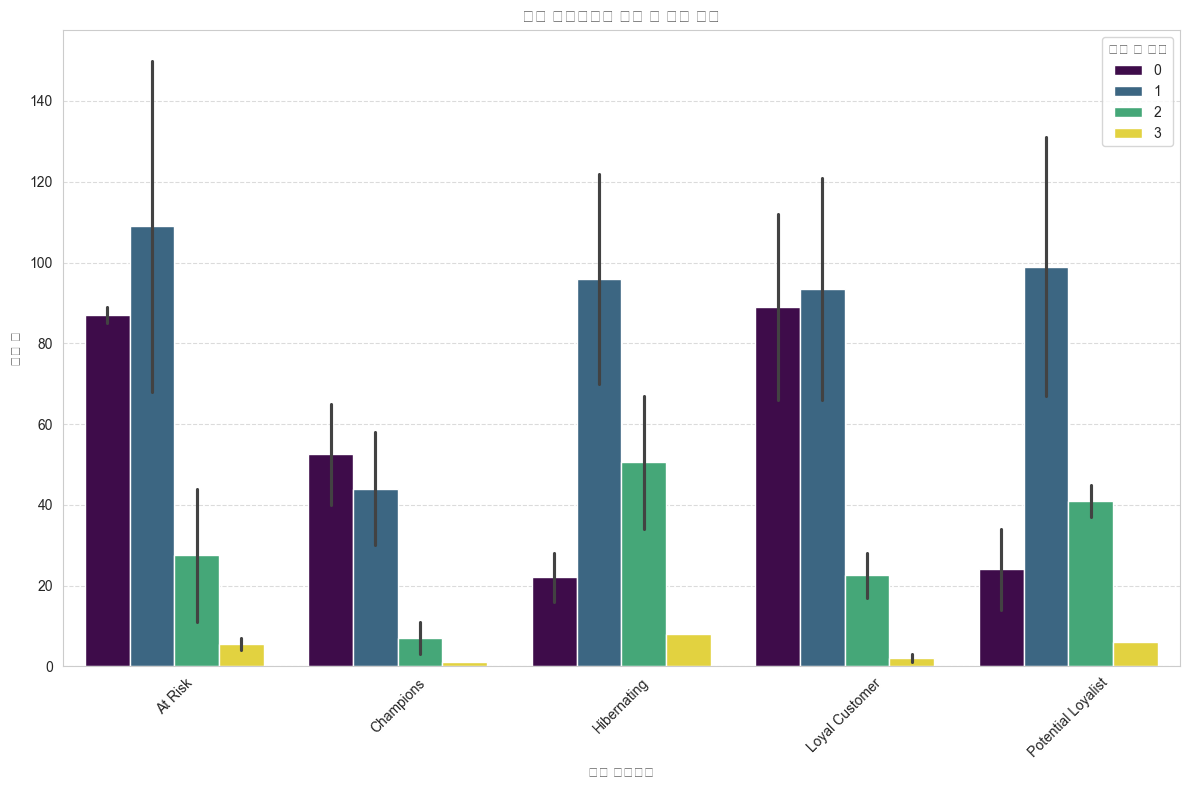

In [116]:
# Marital_Status를 'couple'과 'single'로 분류하는 명시적인 함수
def classify_marital_status(status):
    if status in ['Married', 'Together']:
        return 'couple'
    else:
        return 'single'

# 함수를 적용하여 새로운 열 생성
df['Marital_Status_Group'] = df['Marital_Status'].apply(classify_marital_status)

# 자녀 수 그룹 생성
df['Children_Group'] = df['Kidhome'] + df['Teenhome']

# 그룹화하여 데이터 요약
grouped_df = df.groupby(['Customer_Category', 'Marital_Status_Group', 'Children_Group']).size().reset_index(name='Count')

# 원하는 카테고리들
desired_categories = ['At Risk', 'Champions', 'Hibernating', 'Loyal Customer', 'Potential Loyalist']

# 원하는 카테고리들만 필터링하여 새로운 DataFrame 생성
filtered_df = grouped_df[grouped_df['Customer_Category'].isin(desired_categories)]

# 결과 출력
print(filtered_df)

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer_Category', y='Count', hue='Children_Group', data=filtered_df, palette='viridis')
plt.title('고객 카테고리별 자녀 수 그룹 비율')
plt.xlabel('고객 카테고리')
plt.ylabel('고객 수')
plt.legend(title='자녀 수 그룹')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

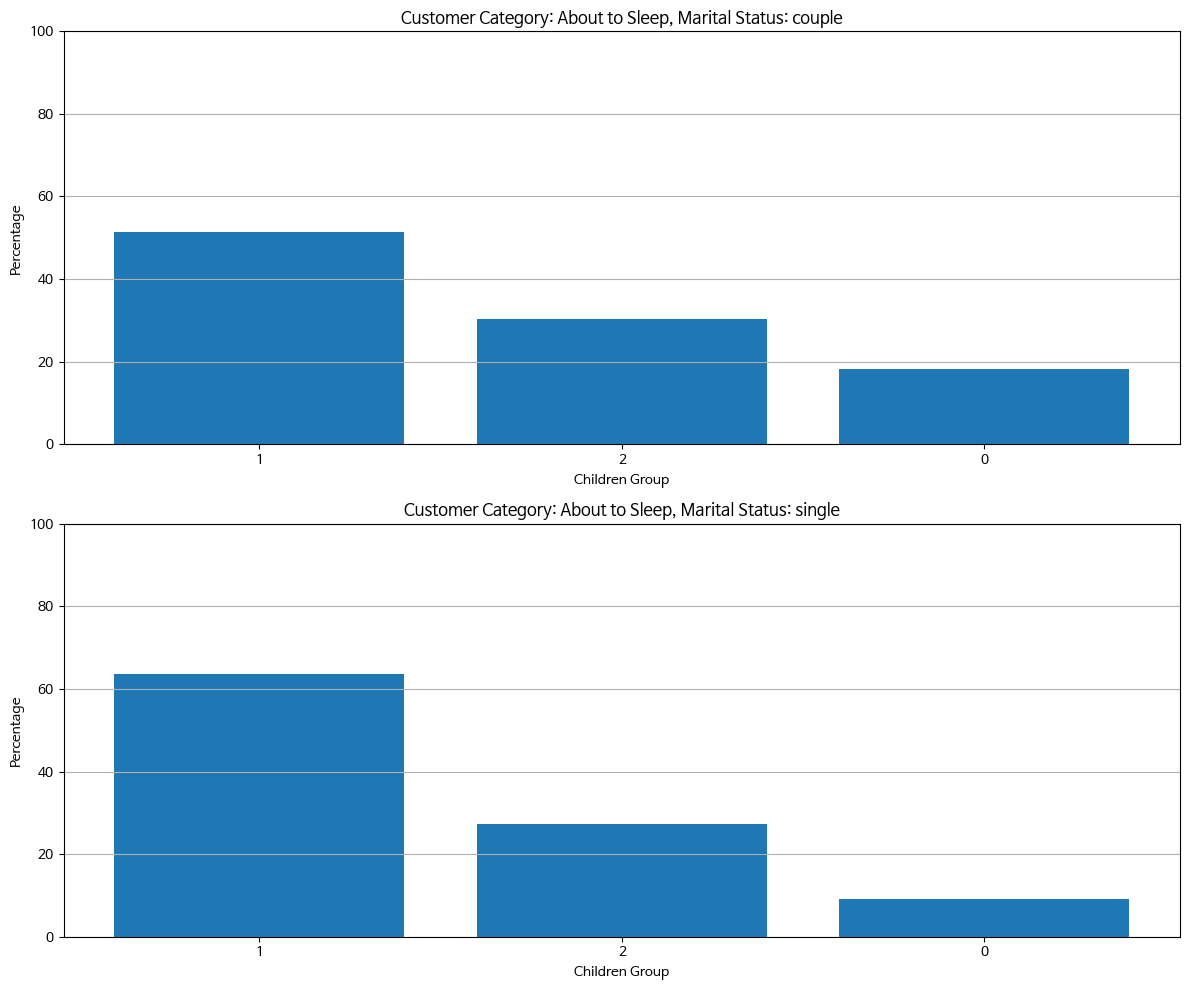

In [106]:
# 함수를 적용하여 새로운 열 생성
df['Marital_Status_Group_1'] = df['Marital_Status'].apply(classify_marital_status)

# 자녀 수 그룹 생성
df['Children_Group'] = df['Kidhome'] + df['Teenhome']

# 그룹별 결혼 상태 및 자녀 수 비율 확인
grouped = df.groupby(['Customer_Category', 'Marital_Status_Group_1'])

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

for ax, (name, group) in zip(axes, grouped):
    ax.set_title(f"Customer Category: {name[0]}, Marital Status: {name[1]}")
    children_ratio = group['Children_Group'].value_counts(normalize=True) * 100
    ax.bar(children_ratio.index.astype(str), children_ratio.values)
    ax.set_xlabel('Children Group')
    ax.set_ylabel('Percentage')
    ax.set_xticks(range(children_ratio.index.max() + 1))
    ax.set_ylim(0, 100)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

Customer Category: About to Sleep
Marital Status Ratio:
Marital_Status_Group
couple    75.0
single    25.0
Name: proportion, dtype: float64
Children Group Ratio:
Children_Group
1    54.5
2    29.5
0    15.9
Name: proportion, dtype: float64

Customer Category: At Risk
Marital Status Ratio:
Marital_Status_Group
couple    62.4
single    37.6
Name: proportion, dtype: float64
Children Group Ratio:
Children_Group
1    47.6
0    38.0
2    12.0
3     2.4
Name: proportion, dtype: float64

Customer Category: Can't Lose Them
Marital Status Ratio:
Marital_Status_Group
couple    72.2
single    27.8
Name: proportion, dtype: float64
Children Group Ratio:
Children_Group
0    58.3
1    36.1
2     2.8
3     2.8
Name: proportion, dtype: float64

Customer Category: Champions
Marital Status Ratio:
Marital_Status_Group
couple    64.6
single    35.4
Name: proportion, dtype: float64
Children Group Ratio:
Children_Group
0    50.2
1    42.1
2     6.7
3     1.0
Name: proportion, dtype: float64

Customer Category

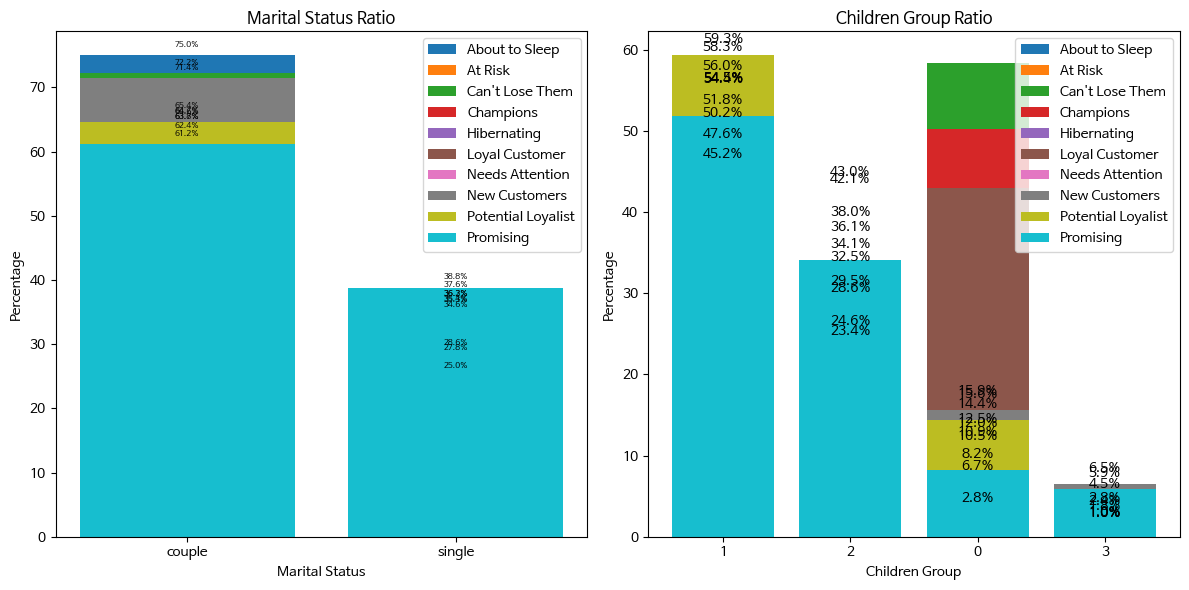

In [105]:
# 그룹별 결혼 상태 및 자녀 수 비율 확인
grouped = df.groupby('Customer_Category')

for name, group in grouped:
    print(f"Customer Category: {name}")
    # 결혼 상태 비율 계산
    marital_status_ratio = group['Marital_Status_Group'].value_counts(normalize=True) * 100
    # 자녀 수 그룹 비율 계산
    children_ratio = group['Children_Group'].value_counts(normalize=True) * 100
    
    print("Marital Status Ratio:")
    print(marital_status_ratio.round(1))
    print("Children Group Ratio:")
    print(children_ratio.round(1))
    print()

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for name, group in grouped:
    marital_status_ratio = group['Marital_Status_Group'].value_counts(normalize=True) * 100
    plt.bar(marital_status_ratio.index.astype(str), marital_status_ratio.values, label=name)
    # 각 막대 위에 비율 값 표시
    for i, v in enumerate(marital_status_ratio):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=6)
plt.title('Marital Status Ratio')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend()

plt.subplot(1, 2, 2)
for name, group in grouped:
    children_ratio = group['Children_Group'].value_counts(normalize=True) * 100
    plt.bar(children_ratio.index.astype(str), children_ratio.values, label=name)
    # 각 막대 위에 비율 값 표시
    for i, v in enumerate(children_ratio):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
plt.title('Children Group Ratio')
plt.xlabel('Children Group')
plt.ylabel('Percentage')
plt.legend()

plt.tight_layout()
plt.show()

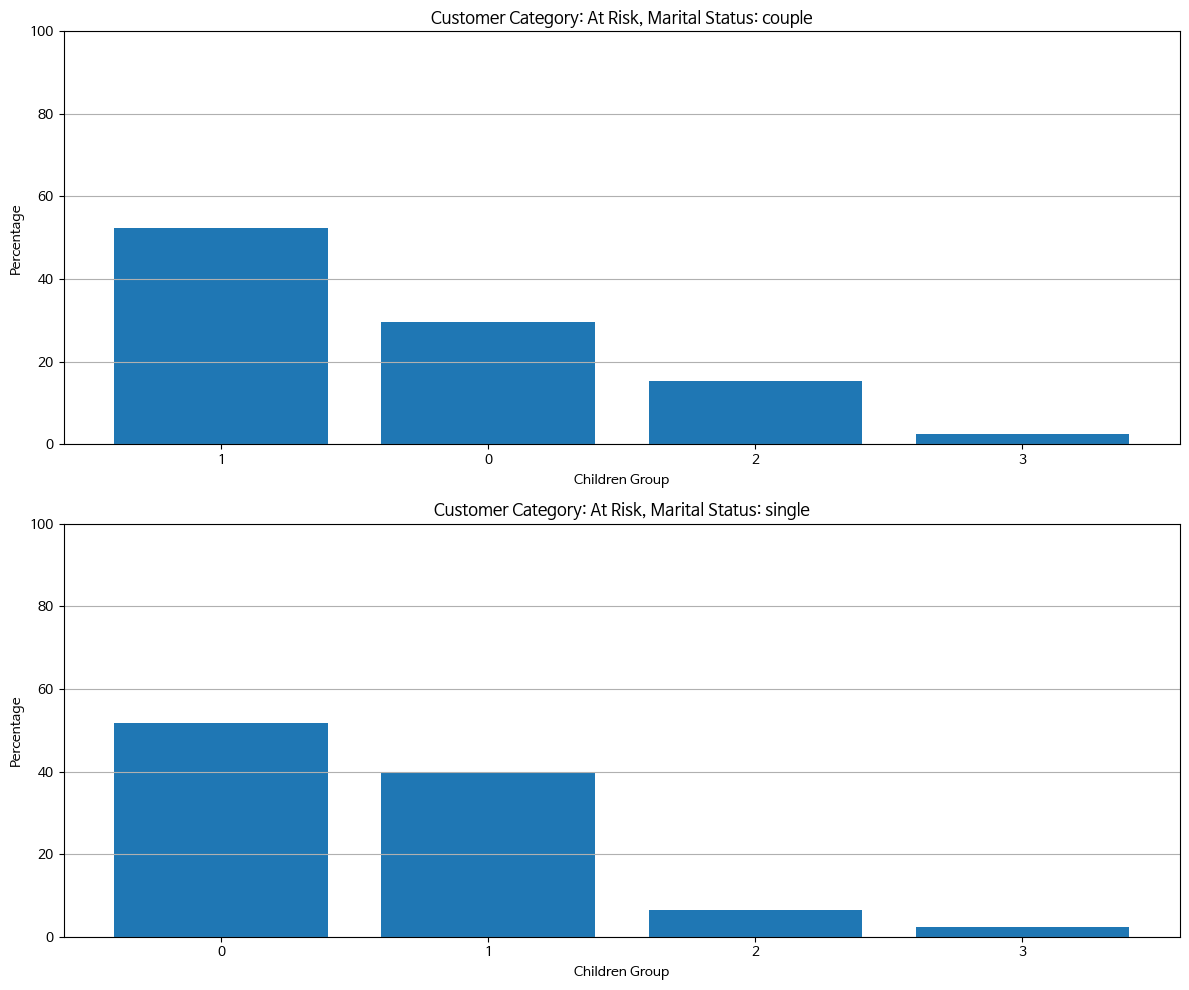

In [108]:
# 필터링할 고객 카테고리 목록
desired_categories = ['Champions', 'Loyal Customer', 'Potential Loyalist', 'Hibernating', 'At Risk']

# 필터링된 데이터프레임 생성
filtered_CMRATIO_df = df[df['Customer_Category'].isin(desired_categories)]

# 그룹별 결혼 상태 및 자녀 수 비율 확인
grouped = filtered_CMRATIO_df.groupby(['Customer_Category', 'Marital_Status_Group_1'])

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

for ax, (name, group) in zip(axes, grouped):
    ax.set_title(f"Customer Category: {name[0]}, Marital Status: {name[1]}")
    children_ratio = group['Children_Group'].value_counts(normalize=True) * 100
    ax.bar(children_ratio.index.astype(str), children_ratio.values)
    ax.set_xlabel('Children Group')
    ax.set_ylabel('Percentage')
    ax.set_xticks(range(children_ratio.index.max() + 1))
    ax.set_ylim(0, 100)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

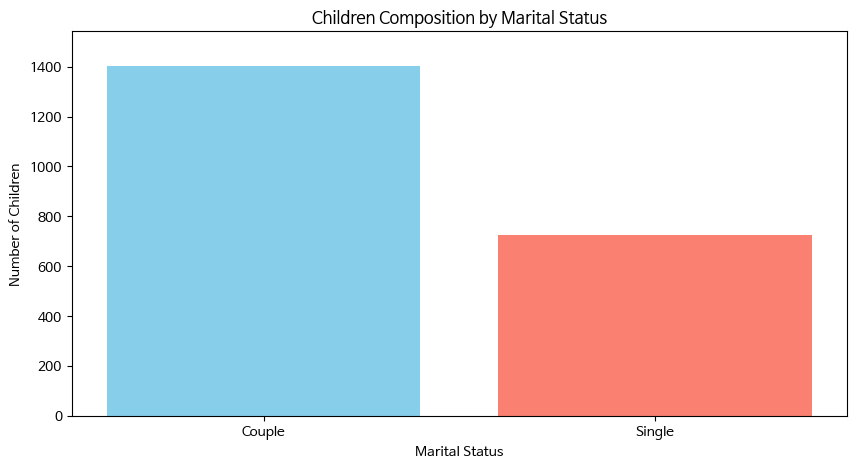

In [102]:
# 커플과 싱글 그룹만 필터링
couple_group = df[df['Marital_Status_Group'] == 'couple']
single_group = df[df['Marital_Status_Group'] == 'single']

# 커플과 싱글 그룹 내에서 자녀 수 합산
couple_children = couple_group['Children_Group'].sum()
single_children = single_group['Children_Group'].sum()

# 시각화
plt.figure(figsize=(10, 5))

plt.bar(['Couple', 'Single'], [couple_children, single_children], color=['skyblue', 'salmon'])
plt.title('Children Composition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Children')
plt.ylim(0, max(couple_children, single_children) * 1.1)  # 최대값을 기준으로 y 축 범위 설정
plt.show()